<a href="https://colab.research.google.com/github/jmtoral/mna-mlops-team46/blob/master/notebooks/1_clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Maestría en Inteligencia Artificial Aplicada
## Equipo 46
<center>

[![Institution](https://img.shields.io/badge/Institution-Tecnológico%20de%20Monterrey-1F497D?style=for-the-badge&logo=tecnologicodemonterrey)](https://tec.mx)
[![Course](https://img.shields.io/badge/Course-Operaciones%20de%20Aprendizaje%20Automático-FF6B6B?style=for-the-badge&logo=python)](https://tec.mx)
[![Activity](https://img.shields.io/badge/Pipeline%201-Limpieza-F9AB00?style=for-the-badge&logo=googlecolab)](https://colab.research.google.com)

</center>

---
## ⚙️ **Operaciones de Aprendizaje Automático (MLOps)**
### 👨‍🏫 **Profesores**
- **Profesores Titulares:** Dr. Gerardo Rodríguez Hernández, Mtro. Ricardo Valdez Hernández, Mtra. María Mylen Treviño Elizondo
- **Profesor Tutor:** Dr. José Carlos Soto Monterrubio

---
## 📊 **Pipeline 2: Exploración y preprocesamiento de datos**
- **Descripción:** Implementación de un pipeline versionado para la limpieza, análisis y modelado del dataset German Credit.

---
## 👥 **Equipo de Trabajo**
### 🚀 **Integrantes y Roles**

| Integrante | Matrícula | Rol |
|---|---|---|
| Jesús Alberto Jiménez Ramos | `A01796903` | 📊 Data Engineer |
| Mónica María Del Rivero Sánchez | `A01362368` | 👩‍🔬 Data Scientist |
| Montserrat Gaytán Morales | `A01332220` | 💻 Software Engineer |
| José Manuel Toral Cruz | `A01122243` | 🤖 ML Engineer |
| Jeanette Rios Martinez | `A01688888` | 🛠️ SRE / DevOps |




---

### **1️ Exploración y preprocesamiento de datos**


---
## 🛠️ **Bibliotecas y Herramientas Utilizadas**
| Herramienta | Descripción | Uso Principal |
|---|---|---|
| **Pandas** | Biblioteca para manipulación y análisis de datos. | Limpieza, transformación y análisis de tablas. |
| **NumPy** | Soporte para vectores y matrices de gran tamaño. | Operaciones numéricas y manejo de nulos. |
| **Matplotlib & Seaborn**| Bibliotecas para visualización de datos. | Creación de gráficos para el EDA. |
| **Scikit-learn** | Ecosistema de herramientas de Machine Learning. | Preprocesamiento y modelado. |
| **Git & GitHub** | Sistema de control de versiones. | Versionado de código y colaboración. |
| **DVC** | Data Version Control. | Versionado de grandes archivos de datos y modelos. |

| Nombre Original (`laufkont`) | Nombre en Inglés (`Variable name`) | Descripción del Contenido | Tipo de Variable |
| :--- | :--- | :--- | :--- |
| **laufkont** | status | Estado de la cuenta corriente del deudor. | Categórica |
| **laufzeit** | duration | Duración del crédito en meses. | Cuantitativa |
| **moral** | credit_history | Historial de cumplimiento de créditos anteriores. | Categórica |
| **verw** | purpose | Propósito para el cual se solicita el crédito. | Categórica |
| **hoehe** | amount | Monto del crédito en marcos alemanes (DM). | Cuantitativa |
| **sparkont** | savings | Ahorros del deudor. | Categórica |
| **beszeit** | employment_duration | Duración del empleo actual del deudor. | Ordinal |
| **rate** | installment_rate | Cuotas del crédito como porcentaje del ingreso disponible. | Ordinal |
| **famges** | personal_status_sex | Información combinada sobre sexo y estado civil. | Categórica |
| **buerge** | other_debtors | Si existe otro deudor o garante para el crédito. | Categórica |
| **wohnzeit** | present_residence | Tiempo (en años) que el deudor ha vivido en su residencia actual. | Ordinal |
| **verm** | property | La propiedad más valiosa del deudor. | Ordinal |
| **alter** | age | Edad en años. | Cuantitativa |
| **weitkred** | other_installment_plans | Planes de pago a plazos con otros proveedores. | Categórica |
| **wohn** | housing | Tipo de vivienda en la que vive el deudor. | Categórica |
| **bishkred** | number_credits | Número de créditos que el deudor tiene en este banco. | Ordinal |
| **beruf** | job | Calidad del trabajo del deudor. | Ordinal |
| **pers** | people_liable | Número de personas que dependen financieramente del deudor. | Binaria |
| **telef** | telephone | Si el deudor tiene una línea telefónica fija a su nombre. | Binaria |
| **gastarb** | foreign_worker | Si el deudor es un trabajador extranjero. | Binaria |
| **kredit** | credit_risk | Si el crédito fue pagado (bueno) o no (malo). | Binaria |

In [ ]:
#@title CELDA 1: Instalación de dependencias
!pip install dvc[gs,s3,ssh,gdrive]

import gdown
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Configuración para mostrar todas las columnas en los resultados de pandas
pd.set_option('display.max_columns', None)

print("Todo fue instalado con éxito.")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")
print(f"Versión de matplotlib: {matplotlib.__version__}")
print(f"Versión de seaborn: {sns.__version__}")

INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.8/438.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.2/466.2 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.6 MB/s

In [ ]:
#@title CELDA 2: Creación de carpeta temporal

nombre_carpeta = "data/raw"

ruta_dataset = os.path.join(os.getcwd(), nombre_carpeta)

if not os.path.exists(ruta_dataset):
    os.makedirs(ruta_dataset)
    print(f"Carpeta '{nombre_carpeta}' creada en: {ruta_dataset}")
else:
    print(f"La carpeta '{nombre_carpeta}' ya existe en: {ruta_dataset}")

Carpeta 'data/raw' creada en: /content/data/raw


In [ ]:
#@title CELDA 3: Descargar y cargar los datasets original y modificado

# IDs de los archivos en Google Drive (reemplaza con los IDs correctos de tus archivos)

file_id_original = '1E5o5k4UPjFwPi9D528dAg75hZftrHE1J'
file_id_modified = '1OjHs6Ec7m04snvR5erV_gmI-9apjHX67'

output_path_original = os.path.join(ruta_dataset, 'german_credit_original.csv')
output_path_modified = os.path.join(ruta_dataset, 'german_credit_modified.csv')

try:
    # Descargar el dataset original
    gdown.download(f'https://drive.google.com/uc?id={file_id_original}', output_path_original, quiet=False)
    print(f"Archivo original descargado exitosamente en: {output_path_original}")

    # Cargar el dataset original
    df_original = pd.read_csv(output_path_original)
    print("Dataset original cargado exitosamente en df_original.")

    # Descargar el dataset modificado
    gdown.download(f'https://drive.google.com/uc?id={file_id_modified}', output_path_modified, quiet=False)
    print(f"Archivo modificado descargado exitosamente en: {output_path_modified}")

    # Cargar el dataset modificado
    df_modified = pd.read_csv(output_path_modified)
    print("Dataset modificado cargado exitosamente en df_modified.")

    print("\n--- Primeras filas del dataset original ---")
    display(df_original.head())

    print("\n--- Primeras filas del dataset modificado por los profesores ---")
    display(df_modified.head())


except Exception as e:
    print(f"Ocurrió un error al descargar o cargar los archivos: {e}")

Downloading...
From: https://drive.google.com/uc?id=1E5o5k4UPjFwPi9D528dAg75hZftrHE1J
To: /content/data/raw/german_credit_original.csv
100%|██████████| 46.9k/46.9k [00:00<00:00, 39.0MB/s]


Archivo original descargado exitosamente en: /content/data/raw/german_credit_original.csv
Dataset original cargado exitosamente en df_original.


Downloading...
From: https://drive.google.com/uc?id=1OjHs6Ec7m04snvR5erV_gmI-9apjHX67
To: /content/data/raw/german_credit_modified.csv
100%|██████████| 96.8k/96.8k [00:00<00:00, 13.7MB/s]

Archivo modificado descargado exitosamente en: /content/data/raw/german_credit_modified.csv
Dataset modificado cargado exitosamente en df_modified.

--- Primeras filas del dataset original ---


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1



--- Primeras filas del dataset modificado por los profesores ---


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,mixed_type_col
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,bad
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,NaN
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,unknown
3,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
4,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,NaN,4.0,2.0,38.0,1.0,2.0,2.0,2.0,error,1.0,1.0,1.0,208


In [ ]:
#@title CELDA 4: Renombrar columnas a inglés

# Diccionario para mapear los nombres de las columnas de alemán a inglés (según la tabla)
column_mapping = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

# Renombrar columnas en df_original
df_original.rename(columns=column_mapping, inplace=True)

# Renombrar columnas en df_modified
df_modified.rename(columns=column_mapping, inplace=True)

print("Nombres de columnas en df_original después de renombrar:")
print(df_original.columns.tolist())

print("\nNombres de columnas en df_modified después de renombrar:")
print(df_modified.columns.tolist())

Nombres de columnas en df_original después de renombrar:
['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

Nombres de columnas en df_modified después de renombrar:
['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk', 'mixed_type_col']


In [ ]:
#@title CELDA 5: Separar Data set por tipo de variable
num_cols = [
    "duration", "amount", "age"
]

cat_cols = [
    "status", "credit_history", "purpose", "savings",
    "personal_status_sex", "other_debtors",
    "other_installment_plans", "housing"
]

ord_cols = [
    "employment_duration", "installment_rate",
    "present_residence", "property",
    "number_credits", "job"
]

bin_cols = [
    "people_liable", "telephone", "foreign_worker", "credit_risk"
]

def subset_df(df, cols):
    cols_ok = [c for c in cols if c in df.columns]
    return df.loc[:, cols_ok].copy()

# 1) Numéricas
num_df = subset_df(df_original, num_cols)
# (opcional) asegurar numérico
for c in num_df.columns:
    num_df[c] = pd.to_numeric(num_df[c], errors="coerce")

# 2) Categóricas nominales
cat_df = subset_df(df_original, cat_cols)
for c in cat_df.columns:
    cat_df[c] = cat_df[c].astype("category")

# 3) Ordinales
ord_df = subset_df(df_original, ord_cols)
for c in ord_df.columns:
    ord_df[c] = ord_df[c].astype("category")

# 4) Binarias
bin_df = subset_df(df_original, bin_cols)
for c in bin_df.columns:
    bin_df[c] = bin_df[c].astype("category")  #  bool/int

# Vista rápida
print("num_df:", num_df.shape, " | cat_df:", cat_df.shape,
      " | ord_df:", ord_df.shape, " | bin_df:", bin_df.shape)



num_df: (1000, 3)  | cat_df: (1000, 8)  | ord_df: (1000, 6)  | bin_df: (1000, 4)


In [ ]:
#@title CELDA:5 Obtener la distribución de cada columna en los data sets

skewness = df_original.select_dtypes(include=['float64', 'int64']).skew()
skewness_df_original = skewness.reset_index()
skewness_df_original.columns = ['Column', 'Skewness']

skewness_df_original['Simetría'] = skewness_df_original['Skewness'].apply(lambda x: 'Aprox. simétrica' if -1 < x < 1 else ('Sesgada a la Derecha' if x > 0 else 'Sesgada a la izquiera'))
print(skewness_df_original)

##Tener sesgo (skewness) en una variable significa que su distribución no es simétrica.
##A medida que la magnitud del sesgo crece (sobre todo si |skew| ≥ 1), aumenta la influencia de outliers, lo que distorsiona medias y varianzas,
##y puede degradar la calidad del entrenamiento.En EDA, detectar ese sesgo funciona como una alarma temprana que te orienta sobre cual es el correcto procesamiento que se debe seguir.

                     Column  Skewness               Simetría
0                    status  0.006957       Aprox. simétrica
1                  duration  1.094184   Sesgada a la Derecha
2            credit_history -0.011886       Aprox. simétrica
3                   purpose  1.178887   Sesgada a la Derecha
4                    amount  1.949594   Sesgada a la Derecha
5                   savings  1.016677   Sesgada a la Derecha
6       employment_duration -0.117615       Aprox. simétrica
7          installment_rate -0.531348       Aprox. simétrica
8       personal_status_sex -0.305146       Aprox. simétrica
9             other_debtors  3.264249   Sesgada a la Derecha
10        present_residence -0.272570       Aprox. simétrica
11                 property  0.045673       Aprox. simétrica
12                      age  1.024712   Sesgada a la Derecha
13  other_installment_plans -1.826518  Sesgada a la izquiera
14                  housing -0.073832       Aprox. simétrica
15           number_cred

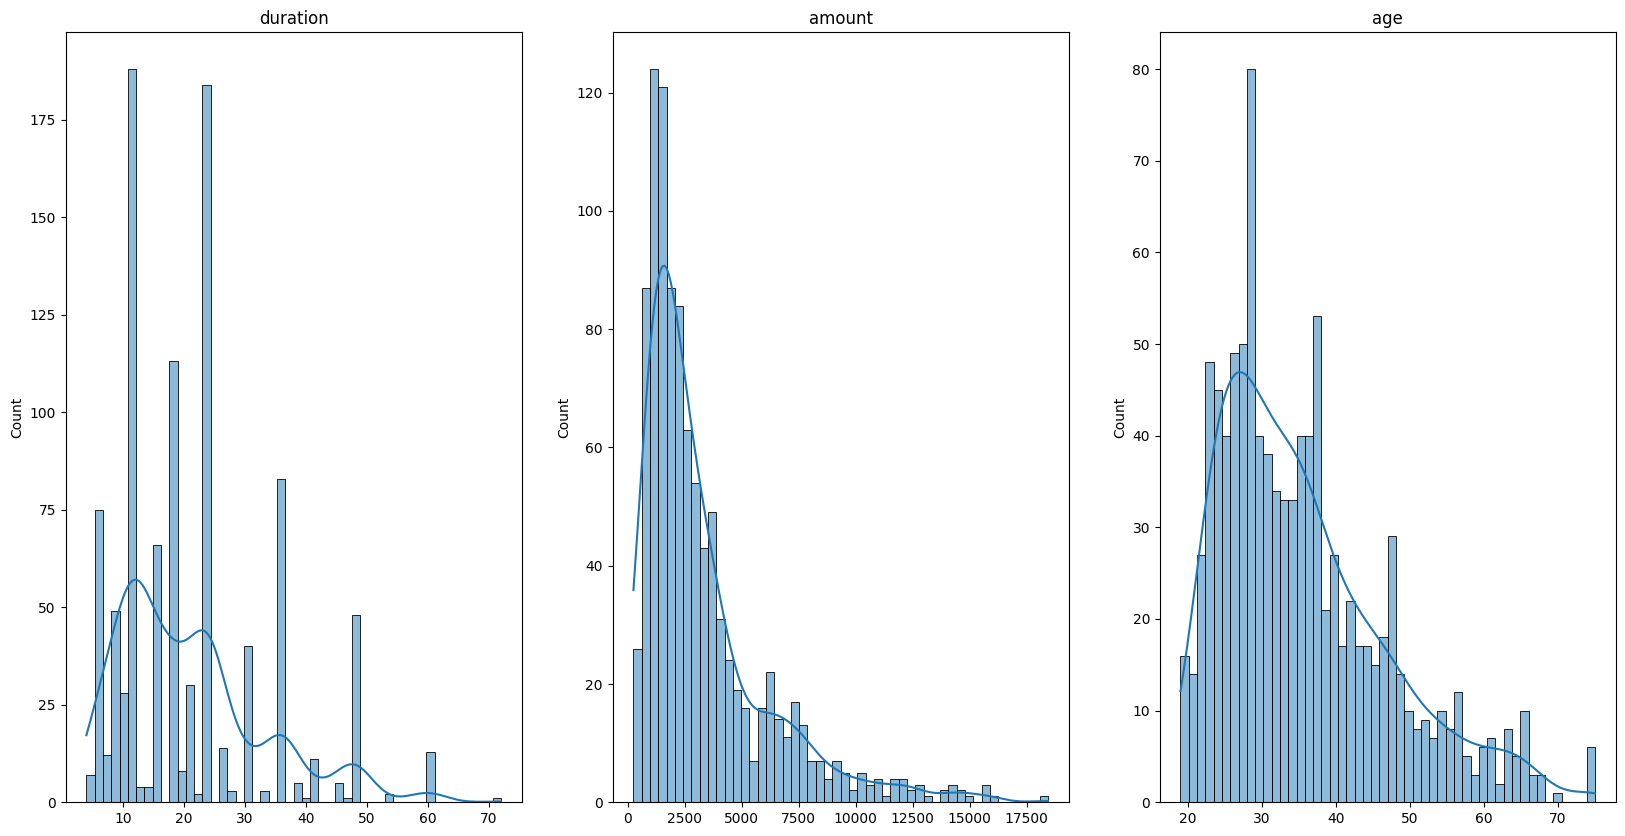

In [ ]:
#@title CELDA 6 :Histogramas de Variables Numéricas

#usando Matplot
fig, axes = plt.subplots(1,3, figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(df_original[num_cols], axes):
  sns.histplot(x=df_original[col],ax=ax,bins=50,kde=True)
  ax.set(title=f'{col}', xlabel=None)

#esconder graficos que no se va na usar.
for i in range(len(num_cols), len(axes)):
    axes[i].axis('off')

plt.show()

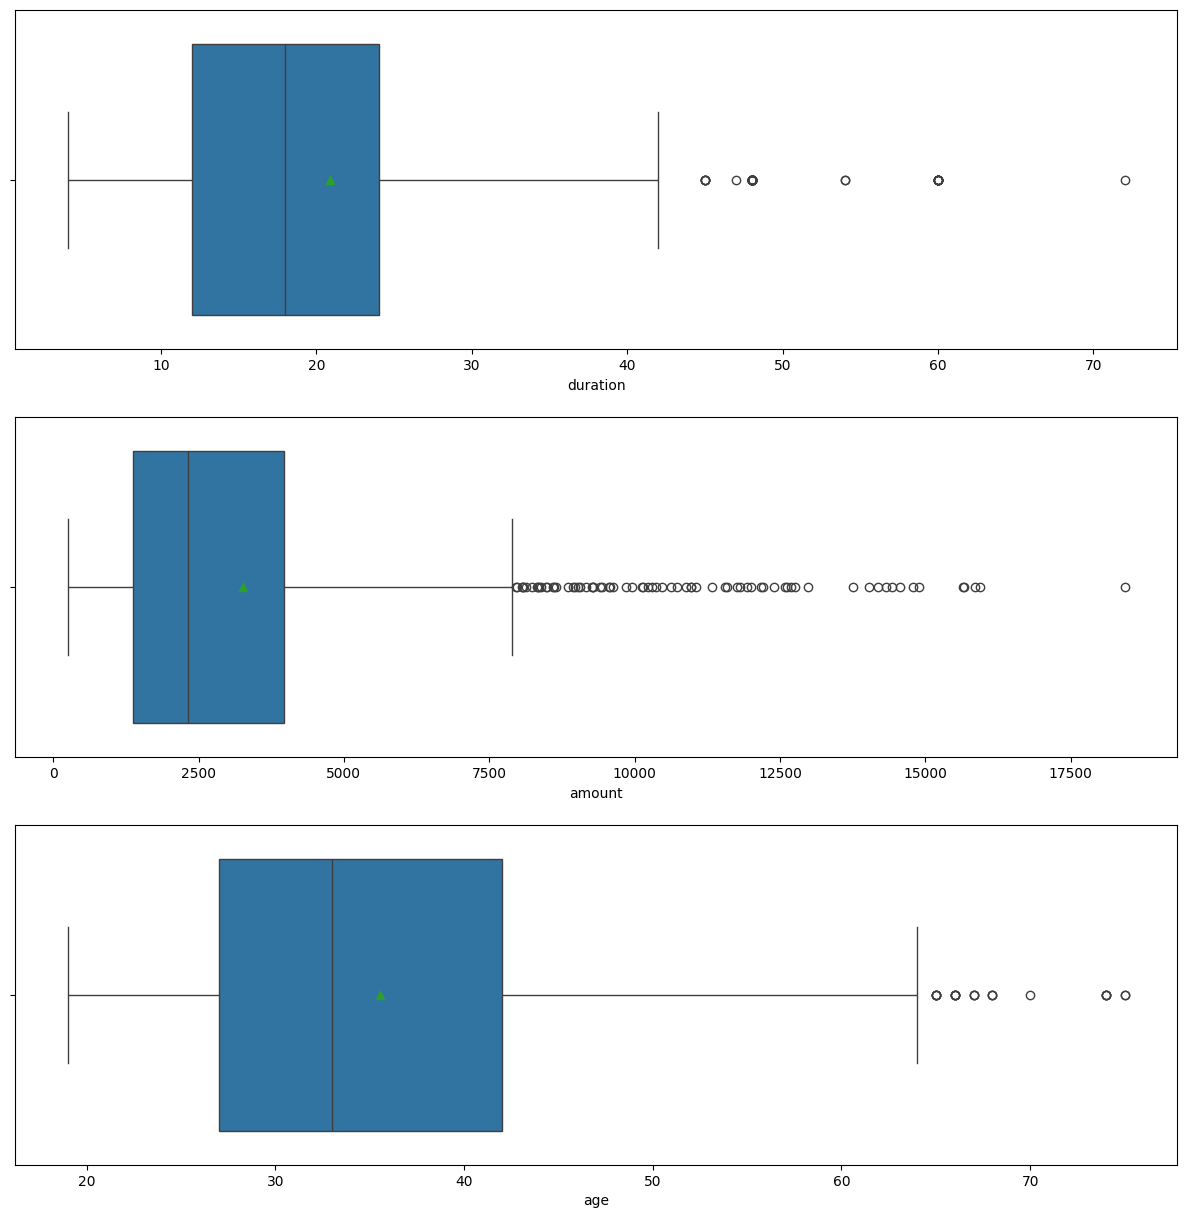

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df_original[num_cols], axes):
  sns.boxplot(x=df_original[col], ax=ax, showmeans=True) # ---> Seaborn
  ax.set(xlabel=f'{col}')

<Axes: >

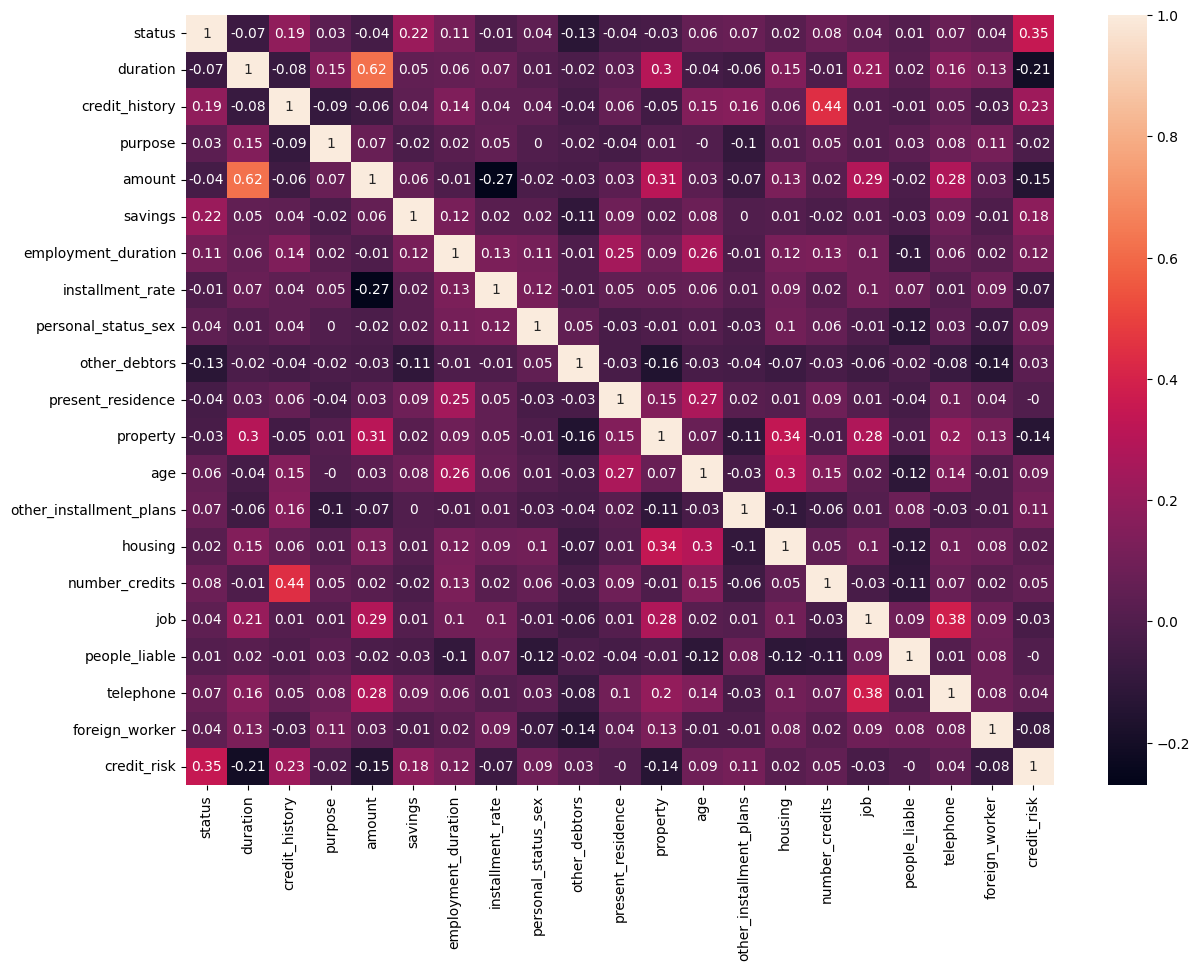

In [ ]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(df_original.corr(numeric_only=True),2), annot = True)

In [ ]:
#@title CELDA 9: Winsorizar variables numéricas para manejar outliers

from scipy.stats.mstats import winsorize
import numpy as np

# Identificar las columnas numéricas (excluyendo las categóricas)
numeric_cols = df_original.select_dtypes(include='number').columns


print("--- Estadísticas de variables numéricas ANTES de winsorizar ---")
display(df_original[numeric_cols].describe())

# Iterar sobre cada columna numérica para aplicar la winsorización
# limits=[0.05, 0.05] significa que el 5% inferior y el 5% superior serán acotados.
for col in numeric_cols:
    df_original[col] = winsorize(df_original[col], limits=[0.01, 0.01])

print("\n--- Estadísticas de variables numéricas DESPUÉS de winsorizar ---")
display(df_original.describe())


print("\n✅ Winsorización completada en todas las columnas numéricas.")

--- Estadísticas de variables numéricas ANTES de winsorizar ---


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.904000,2.54500,2.828000,3259.313000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.494000,2.675000,1.928000,1.401000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,11.996612,1.08312,2.744439,2766.878295,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.195146,0.705601,0.530186,0.555435,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,6.000000,0.00000,0.000000,426.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,60.000000,4.00000,10.000000,14179.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,67.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000



--- Estadísticas de variables numéricas DESPUÉS de winsorizar ---


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.904000,2.54500,2.828000,3259.313000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.494000,2.675000,1.928000,1.401000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,11.996612,1.08312,2.744439,2766.878295,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.195146,0.705601,0.530186,0.555435,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,6.000000,0.00000,0.000000,426.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,60.000000,4.00000,10.000000,14179.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,67.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000



--- Estadísticas de variables numéricas original ---

✅ Winsorización completada en todas las columnas numéricas.


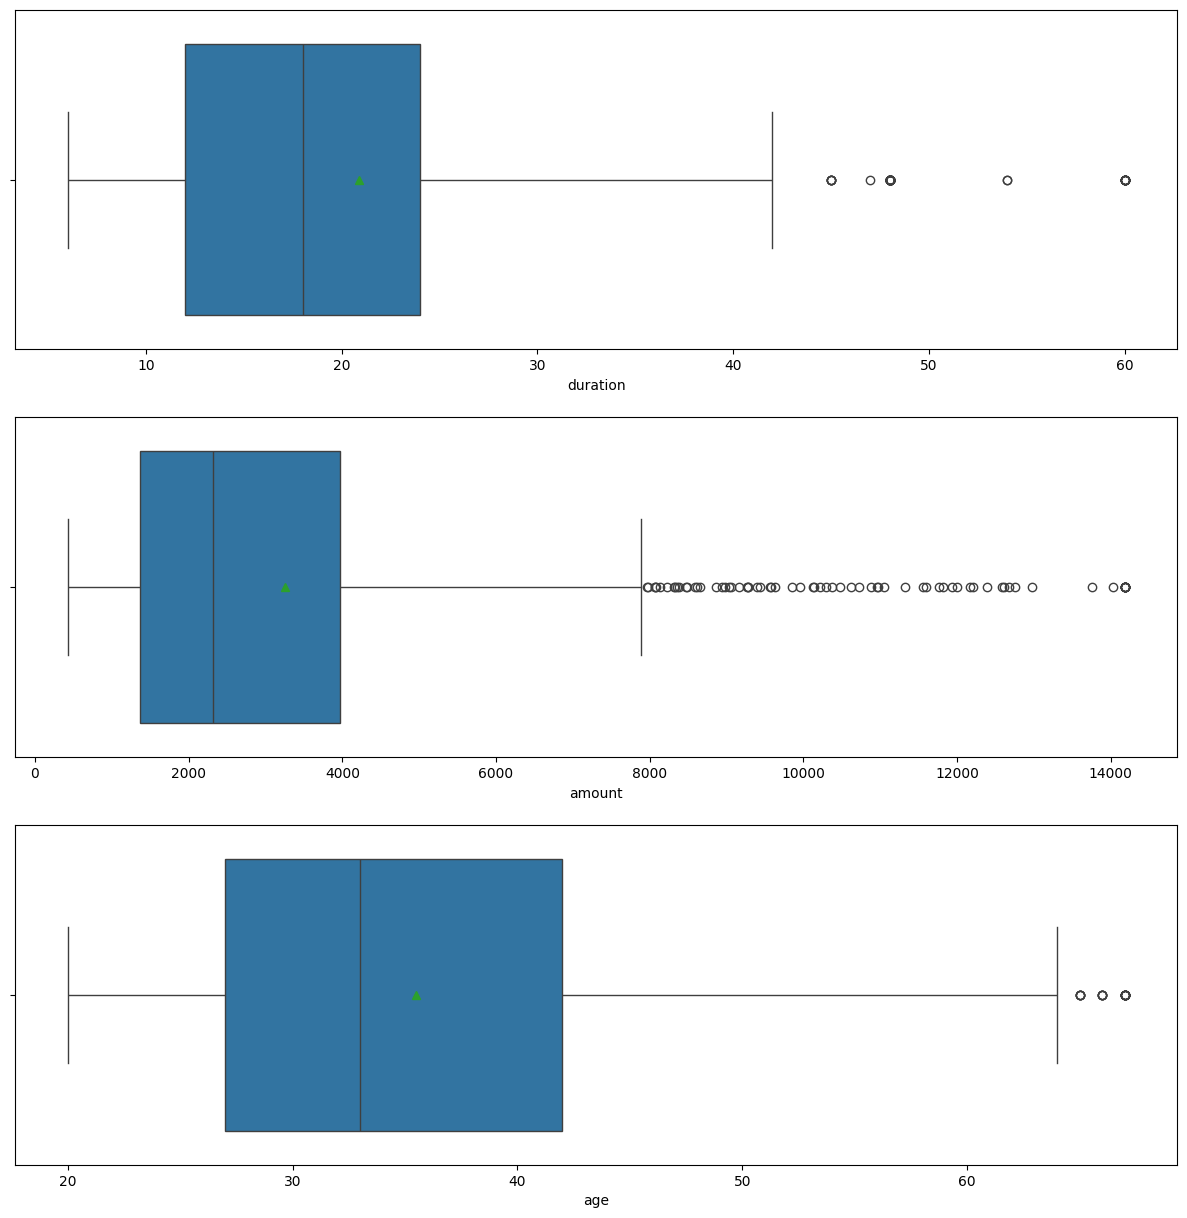

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df_original[num_cols], axes):
  sns.boxplot(x=df_original[col], ax=ax, showmeans=True) # ---> Seaborn
  ax.set(xlabel=f'{col}')

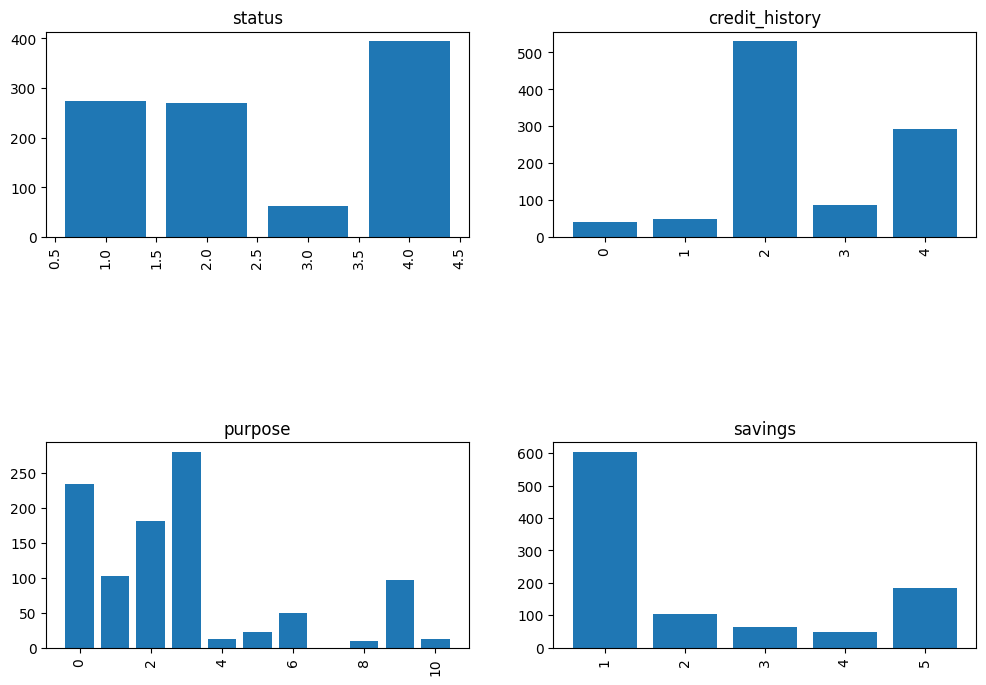

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=1)
axes = axes.ravel()
for col, ax in zip(df_original[cat_cols], axes):
  value_counts = df_original[col].value_counts()
  ax.bar(value_counts.index, value_counts.values) # ---> Matplotlib
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)